Quando l'algoritmo non fornisce indicazioni sull'importanza delle feature, possiamo comunque utilizzare delle tecniche per misurarla "a posteriori"
- utilissimo per tecniche più potenti ma opache

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor # reti neurali opache per definizione
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

from sklearn.inspection import permutation_importance, plot_partial_dependence

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [3]:
X.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10147,6.1825,33.0,6.961165,0.927184,1204.0,2.922330,33.91,-117.92
11200,1.1190,9.0,3.569231,1.132308,735.0,2.261538,33.83,-117.91
14764,2.3000,23.0,4.305699,0.976684,1318.0,3.414508,32.58,-117.10
15028,3.4421,31.0,4.725907,1.020025,1886.0,2.360451,32.79,-117.01
7614,3.0417,41.0,6.009288,1.136223,1204.0,3.727554,33.88,-118.23


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
steps = [
    ( 'scaler', QuantileTransformer() ), # prova a toglierlo!
    ( 'model', MLPRegressor( hidden_layer_sizes=(20,20), alpha=0.05 ) ),
]

In [6]:
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

/home/piero/Desktop/pythonazzo/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.7741533297801468, 0.7708194043824432)

La tecnica che utilizziamo si chiama "Permutation feature importance"
- addestriamo il modello, poi
- facciamo lo shuffle di una delle feature
- misuriamole prestazioni (shuffle e misura ripetuto più volte)
- di quanto diminuiscono? --> importanza
- rimettiamo a posto la feature e ripetiamo il procedimento con la seconda, terza e così via
- RECAP: randomizziamo una feature per volta per vedere di quanto si abbassa lo score del modello

In [7]:
res = permutation_importance(pipe, X_test, y_test, n_repeats=10)

In [8]:
res

{'importances_mean': array([0.61701633, 0.04735789, 0.10680988, 0.00899905, 0.00767956,
        0.18758606, 1.3815209 , 1.21382488]),
 'importances_std': array([0.00826498, 0.00244036, 0.00312217, 0.00116761, 0.00093159,
        0.00552558, 0.02079879, 0.02914789]),
 'importances': array([[0.60996896, 0.62046431, 0.6170888 , 0.61481603, 0.62223242,
         0.61269466, 0.63301546, 0.62208075, 0.61777432, 0.60002754],
        [0.04562292, 0.04787844, 0.04939925, 0.05056373, 0.04444024,
         0.04811285, 0.0474887 , 0.04732688, 0.05029638, 0.04244949],
        [0.10801808, 0.10431586, 0.10311837, 0.10613665, 0.10043795,
         0.10933058, 0.10866778, 0.10894073, 0.1112359 , 0.10789686],
        [0.00923081, 0.00967108, 0.00943826, 0.00866334, 0.00756285,
         0.00800551, 0.00675002, 0.00988129, 0.01024189, 0.01054543],
        [0.00882349, 0.00675831, 0.00723444, 0.0089704 , 0.00776286,
         0.0068559 , 0.0092225 , 0.00671187, 0.00757906, 0.00687676],
        [0.18902601, 0.

In [9]:
df = pd.DataFrame(res['importances'].T, columns=X.columns)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.609969,0.045623,0.108018,0.009231,0.008823,0.189026,1.365987,1.248831
1,0.620464,0.047878,0.104316,0.009671,0.006758,0.192176,1.389042,1.220604
2,0.617089,0.049399,0.103118,0.009438,0.007234,0.193822,1.408054,1.171944
3,0.614816,0.050564,0.106137,0.008663,0.008970,0.189855,1.423682,1.251531
4,0.622232,0.044440,0.100438,0.007563,0.007763,0.190612,1.386524,1.167436
5,0.612695,0.048113,0.109331,0.008006,0.006856,0.188074,1.365399,1.217311
6,0.633015,0.047489,0.108668,0.006750,0.009222,0.177800,1.355849,1.205302
7,0.622081,0.047327,0.108941,0.009881,0.006712,0.193263,1.358417,1.249163
8,0.617774,0.050296,0.111236,0.010242,0.007579,0.181959,1.386974,1.190184
9,0.600028,0.042449,0.107897,0.010545,0.006877,0.179273,1.375280,1.215942


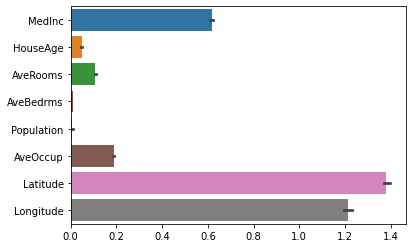

In [10]:
sns.barplot(data=df, orient='h')

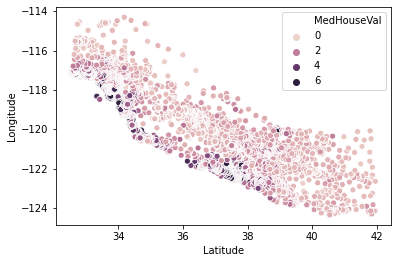

In [11]:
sns.scatterplot(data=X, x='Latitude', y='Longitude', hue=y)

Un ulteriore tecnica chiamata Partial Dependence Plot permette di visualizzare la relazione diretta tra una feature e il target
- prende una feature
- fissa un valore per quella feature
- prende le predizioni su tutti i record tenendo fisso il valore della feature
- fa una media dell'output
- aumenta il valore della feature, e ripete fino a fine range

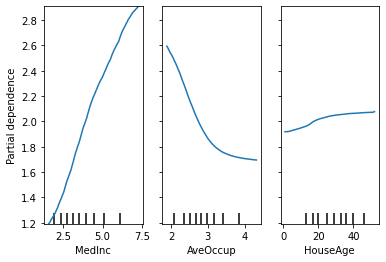

In [20]:
plot_partial_dependence( pipe, X_test, features=[ 'MedInc', 'AveOccup', 'HouseAge' ] )

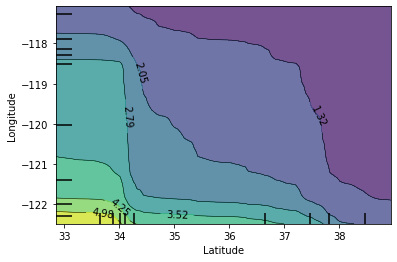

In [21]:
plot_partial_dependence( pipe, X_test, features=[('Latitude', 'Longitude')] )